In [1]:
import matplotlib.pyplot
%matplotlib inline

In [5]:
class Dog:
    
    def bark(self): # 클래스 내에 함수를 정의할 때에 이런식으로 꼭 self를 적어줘야 함.
        print("woof!")
        pass
    
    pass


In [ ]:
matplotlib.pyplot.imshow()

In [6]:
sizzles=Dog()
sizzles.bark()

woof!


In [7]:
class Dog:
    # 생성자
    def __init__(self,petname,temp):
        self.name=petname
        self.temperature=temp
        
    def status(self):
        print("dog name is ", self.name)
        print("dog temperature is ", self.temperature)
        pass
    
    def setTemperature(self, temp):
        self.temperature=temp
        pass
    
    def bark(self):
        print("woof!")
        pass
    
    pass



In [8]:
lassie = Dog("Lassie",37)

In [9]:
lassie.status()

dog name is  Lassie
dog temperature is  37


In [10]:
lassie.setTemperature(10)

In [11]:
lassie.status()

dog name is  Lassie
dog temperature is  10


In [2]:
class neuralNetwork:
    
    # 신경망 초기화
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        
        # 입력 , 은닉 , 출력 계층의 노드 개수 설정
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        # 학습률
        self.lr=learningrate
        
        # 가중치 행렬 wih와 who
        # w_i_h = i 노드에서 다음 계층 노드 h로 연결됨을 뜻함.
        
        # 0.0 = 정규분포의 중심
        # pow = 들어온 노드의 개수에 루트를 씌우고 역수를 취한 모습
        # 3번째 인자 = np.random.rand(self.hnodes, self.inodes)   self.hnodes by self.inodes 0~1 임의의 값 생성
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes, self.inodes))
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        # 활성화 함수로 exoit 즉, 시그모이드 함수 사용
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # 신경망 학습
    def train(self, inputs_list, targets_list):
        
        # 입력 리스트를 2차원의 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T
        
        # self.wih 는 i에서 h로 가는 가중치
        hidden_inputs = np.dot(self.wih,inputs)
        
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        # self.who 는 h에서 o로 가는 가중치
        # 가중치와 출력을 행렬곱
        final_inputs = np.dot(self.who,hidden_outputs)
        
        # 최종 출력 계층에서 나가는 신호를 계산
        # activation_function은 시그모이드 함수
        final_outputs = self.activation_function(final_inputs)
        
        # 출력 계층의 오차는 (실제 값 - 계산 값)
        output_errors = targets - final_outputs
        
        # 은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해 계산
        # 가중치와 오차를 행렬곱
        hidden_errors = np.dot(self.who.T,output_errors)
        
        # 은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)), np.transpose(hidden_outputs))
        
        # 입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), np.transpose(inputs))
        
        pass
       
    
    # 신경망에 질의
    def query(self, inputs_list):
        
        # 3 by 3 계층 노드를 보면서 이해할것!
        
        # 입력 리스트를 2차원 행렬로 변환
        inputs = np.array(inputs_list, ndmin=2).T
        
        # 은닉 계층에서 들어오는 신호를 계산 (dot 이용해서 행렬 곱 계산)
        # self.wih 는 i에서 h로 가는 가중치
        hidden_inputs = np.dot(self.wih,inputs)
        
        # 은닉 계층에서 나가는 신호를 계산
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # 최종 출력 계층으로 들어오는 신호를 계산
        # self.who 는 h에서 o로 가는 가중치
        final_inputs = np.dot(self.who,hidden_outputs)
        
        # 최종 출력 계층에서 나가는 신호를 계산
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs


In [38]:
inputnodes=3
hiddennodes=3
outputnodes=3

learningrate=0.3
        

n = neuralNetwork(inputnodes,hiddennodes,outputnodes,learningrate)

In [3]:
import numpy as np

In [4]:
np.random.rand(3,3) # 3by3 0 ~ 1 임의 값 생성

array([[0.73255556, 0.43077873, 0.23451264],
       [0.54708483, 0.20321082, 0.0280069 ],
       [0.5618649 , 0.29902212, 0.94428673]])

In [5]:
np.random.rand(3,3) - 0.5 # 3by3 -0.5 ~ 0.5임의 값 생성

array([[-0.33618266, -0.11934079, -0.11634351],
       [ 0.48695065, -0.25930118,  0.25776869],
       [-0.43258859,  0.18473327, -0.06634904]])

In [6]:
import scipy.special

In [44]:
n.query([1.0,0.5,-1.5])

array([[0.31161931],
       [0.7554646 ],
       [0.39626245]])

In [32]:
data_file = open("mnist_dataset/mnist_train_100.csv",'r')
data_list=data_file.readlines()
data_file.close()

In [33]:
data_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [34]:
len(data_list)

100

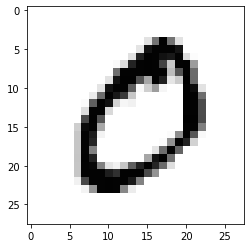

In [35]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape((28,28)) # 0번째를 제외한 모든 value를 문자열 -> 숫자로 변환 후 28 by 28 행렬로 만듦
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [13]:
# 입력 색상값들은 0~255 사이이므로 이를 전처리 하는과정
# 입력 범위는 0.01 ~ 0.1이 적합하므로 이렇게 처리하였다.
scaled_input = (np.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
print(scaled_input)

[0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0.01       0.01       0.01       0.01
 0.01       0.01       0

In [21]:
onodes=10
# target은 목표 값
# 출력노드들을 모두 0.01로 초기화
targets=np.zeros(onodes) + 0.01
# 우리가 원하는 정답의 value만 0.99로 설정
targets[int(all_values[0])] = 0.99

In [22]:
print(targets)

[0.99 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]


In [9]:
# 문자열의 픽셀 배열은 28X28 이므로 784개의 input
inputnodes=784
# 은닉 노드 < 입력 노드 , 은닉 노드는 적당한 값을 선택한다.
hiddennodes=100

# 출력 노드는 0~9 값이므로 10개
outputnodes=10

learningrate=0.3
        

n = neuralNetwork(inputnodes,hiddennodes,outputnodes,learningrate)

training_data_file = open("mnist_dataset/mnist_train_100.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망을 학습시키는 과정 (가중치를 학습시킴)
# 모든 data를 반복하며 학습을 시킴
for record in training_data_list:
    all_values = record.split(',')
    # 입력값 0.01 ~ 1.0 으로 전처리
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 목표 값 전처리 
    targets = np.zeros(outputnodes) + 0.01
    
    # all_values[0] 는 목표 숫자이다. 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [10]:
test_data_file = open("mnist_dataset/mnist_test_10.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [46]:
all_values = test_data_list[0].split(',')

print(all_values[0])

7


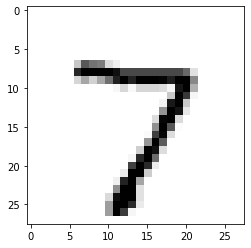

In [47]:
image_array=np.asfarray(all_values[1:]).reshape((28,28))
matplotlib.pyplot.imshow(image_array,cmap='Greys',interpolation='None')

In [54]:
# 정말 amazing하게 위에서 학습을 시키고 test를 해보니 숫자 7의 결과만 높은것을 확인할 수 있다.
n.query((np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.1)

array([[0.02413553],
       [0.81622897],
       [0.0211519 ],
       [0.02848071],
       [0.01836987],
       [0.02047934],
       [0.00890625],
       [0.07136123],
       [0.07581737],
       [0.00114774]])

In [11]:
# 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard=[]

for record in test_data_list:
    all_values = record.split(',')
    # 정답은 첫번 째 값
    correct_label = int(all_values[0])
    print(correct_label, 'correct label')
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # 신경망에 질의
    outputs = n.query(inputs)
    
    # outputs 중 가장 높은값이 label
    label = np.argmax(outputs)
    print(label,"network's answer")
    
    # 정답인 경우 1을 아닌경우 0을 더함
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass


7 correct label
7 network's answer
2 correct label
3 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
3 network's answer
5 correct label
4 network's answer
9 correct label
7 network's answer


In [12]:
# 10개중 총 6개만 신경망이 잘 추측해낸 것을 알 수 있다.
print(scorecard)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 0]


In [13]:
# 60%의 정확도를 확인할 수 있다.
scorecard_array = np.asarray(scorecard)
print("performance =",scorecard_array.sum() / scorecard_array.size)

performance = 0.6


In [18]:
# 이제 다시 결과의 정확도를 위해 데이터의 개수를 6만개로 늘려서 학습을 진행해보도록 하겠다.
# 문자열의 픽셀 배열은 28X28 이므로 784개의 input
inputnodes=784
# 은닉 노드 < 입력 노드 , 은닉 노드는 적당한 값을 선택한다.
hiddennodes=100

# 출력 노드는 0~9 값이므로 10개
outputnodes=10

learningrate=0.3
        

n = neuralNetwork(inputnodes,hiddennodes,outputnodes,learningrate)

training_data_file = open("mnist_dataset/mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

# 신경망을 학습시키는 과정 (가중치를 학습시킴)
# 모든 data를 반복하며 학습을 시킴
for record in training_data_list:
    all_values = record.split(',')
    # 입력값 0.01 ~ 1.0 으로 전처리
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # 목표 값 전처리 
    targets = np.zeros(outputnodes) + 0.01
    
    # all_values[0] 는 목표 숫자이다. 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

In [21]:
test_data_file = open("mnist_dataset/mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [22]:
# 데이터를 늘려서 학습시킨 뒤 다시 신경망 테스트

# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard=[]

for record in test_data_list:
    all_values = record.split(',')
    # 정답은 첫번 째 값
    correct_label = int(all_values[0])
    print(correct_label, 'correct label')
    
    inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # 신경망에 질의
    outputs = n.query(inputs)
    
    # outputs 중 가장 높은값이 label
    label = np.argmax(outputs)
    print(label,"network's answer")
    
    # 정답인 경우 1을 아닌경우 0을 더함
    if(label == correct_label):
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
    pass

7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
0 correct label
0 ne

0 correct label
0 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
5 correct label
3 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
5 correct label
5 ne

2 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
7

8 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
4 correct label
6 network's answer
5 correct label
5 network's answer
3 correct label
8 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9

2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2

6 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
9 correct label
3 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
8 correct label
0 network's answer
7 correct label
3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
7 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
3

1 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0

8 network's answer
8 correct label
0 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
0 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
2 correct label
7 network's answer
3

7 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
6 correct label
0 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
0

6 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
5 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
9 network's answer
4 correct label
4 network's answer
7

4 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3 correct label
5 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
4 correct label
6 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
5 correct label
9 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
7

1 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
7 correct label
9 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
2 correct label
5 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
6

1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
8 correct label
0 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
7

3 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
3 correct label
8 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7

3 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
7 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
4 network's answer
1

0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
0 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
7 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
8 correct label
7 network's answer
7 correct label
3 network's answer
6 correct label
6 network's answer
9 correct label
1 network's answer
3 correct label
3 network's answer
9

8 correct label
8 network's answer
9 correct label
4 network's answer
0 correct label
0 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
4 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
7 correct label
2 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
8 correct label
8 ne

9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
3 correct label
8 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
5

6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
6 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3

8 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
8 correct label
8 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
9 network's answer
4 correct label
0 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
5 correct label
3 network's answer
3 correct label
3 network's answer
1

0 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
9 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
6

9 network's answer
5 correct label
5 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
4

0 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
6 correct label
6 network's answer
1 correct label
8 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
2 correct label
6 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
1

3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
1 correct label
1 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
8

6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
8 correct label
8 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
3 correct label
3 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
4 correct label
4 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
5

2 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
3 correct label
8 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
0

5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
9 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
2 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
5 correct label
5 network's answer
8

4 network's answer
9 correct label
9 network's answer
2 correct label
8 network's answer
4 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
0 correct label
0 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
3 correct label
0 network's answer
6 correct label
6 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4

7 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
4 correct label
4 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
7 correct label
7 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
4 correct label
9 network's answer
3 correct label
3 network's answer
8 correct label
6 network's answer
2 correct label
2 network's answer
8 correct label
6 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
0 correct label
0 network's answer
5 correct label
5 network's answer
4

9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
9 correct label
9 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
5 correct label
5 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
2

3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
9 correct label
9 network's answer
2 correct label
2 network's answer
0 correct label
0 network's answer
3 correct label
3 network's answer
9 correct label
9 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
7 correct label
7 network's answer
3 correct label
3 network's answer
8 correct label
8 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
8 correct label
8 network's answer
5 correct label
5 network's answer
8 correct label
8 network's answer
2 correct label
2 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
3

8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
5 correct label
5 network's answer
6 correct label
6 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
9 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
7 correct label
7 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
4

7 network's answer
6 correct label
6 network's answer
4 correct label
4 network's answer
9 correct label
9 network's answer
9 correct label
9 network's answer
5 correct label
5 network's answer
3 correct label
3 network's answer
7 correct label
7 network's answer
4 correct label
4 network's answer
3 correct label
3 network's answer
0 correct label
0 network's answer
4 correct label
9 network's answer
6 correct label
6 network's answer
6 correct label
6 network's answer
1 correct label
1 network's answer
1 correct label
1 network's answer
3 correct label
3 network's answer
2 correct label
2 network's answer
1 correct label
1 network's answer
0 correct label
0 network's answer
0 correct label
0 network's answer
1 correct label
1 network's answer
2 correct label
2 network's answer
3 correct label
3 network's answer
4 correct label
4 network's answer
7 correct label
7 network's answer
8 correct label
8 network's answer
9 correct label
4 network's answer
0 correct label
0 network's answer
1

In [24]:
# 학습 데이터의 수를 늘리니 무려 95%에 근사하는 값이 나왔다!!!
scorecard_array = np.asarray(scorecard)
print("performance =",scorecard_array.sum() / scorecard_array.size)

performance = 0.9477


### performance를 늘리기 위해서는 학습률을 조정하는것이 가능하다 ! 현재는 0.1 ~ 0.3 이 적절한 결과로 나옴
### 또한 학습을 여러 번 반복해서 주기를 늘리는 방법도 가능하다. 하지만 너무 많은 학습은 '오버피팅'을 유발할 수 있다. 따라서 주기도 최적의 주기를 구하야 하며 현재는 5-7의 주기가 적절한 결과로 나온다.

## 이 둘을 서로 조합하며 performance를 늘릴 수 있다. 주기가 높아지면 학습률을 낮추어서 더 나은 성능을 기대가 가능하다. 이러한 주기와 학습률의 다양한 조합을 통해 최적의 결과를 이끌어내야 한다.

## 마지막으로 은닉노드의 개수에 변화를 줄 수 있다. 학습할 노드가 많아지면 결과가 좋아질것은 충분히 예상되는 결과이므로 은닉 노드의 개수를 늘려줌으로써 performance를 증가 시킬 수 있다.

In [40]:
# 주기 , 학습률 , 은닉노드의 개수를 서로 변경하면서 최적의 perfomance를 찾아내는 프로그램


# 신경망의 성능의 지표가 되는 성적표를 아무 값도 가지지 않도록 초기화
scorecard=[]

for i in range (900):  
    # 문자열의 픽셀 배열은 28X28 이므로 784개의 input
    inputnodes=784
    # 은닉 노드 < 입력 노드 , 은닉 노드는 적당한 값을 선택한다.
    hiddennodes=100 + i

    # 출력 노드는 0~9 값이므로 10개
    outputnodes=10

    learningrate=0.3 + i*0.001


    n = neuralNetwork(inputnodes,hiddennodes,outputnodes,learningrate)

    training_data_file = open("mnist_dataset/mnist_train.csv",'r')
    training_data_list = training_data_file.readlines()
    training_data_file.close()

    # 신경망을 학습시키는 과정 (가중치를 학습시킴)
    # 모든 data를 반복하며 학습을 시킴
    for j in range (round((hiddennodes-100)/45) + 1):
        for record in training_data_list:
            all_values = record.split(',')
            # 입력값 0.01 ~ 1.0 으로 전처리
            inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
            # 목표 값 전처리 
            targets = np.zeros(outputnodes) + 0.01

            # all_values[0] 는 목표 숫자이다. 
            targets[int(all_values[0])] = 0.99
            n.train(inputs, targets)
            pass


    # 데이터를 늘려서 학습시킨 뒤 다시 신경망 테스트

    for record in test_data_list:
        all_values = record.split(',')
        # 정답은 첫번 째 값
        correct_label = int(all_values[0])
        #print(correct_label, 'correct label')

        inputs = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

        # 신경망에 질의
        outputs = n.query(inputs)

        # outputs 중 가장 높은값이 label
        label = np.argmax(outputs)
        #print(label,"network's answer") 

        # 정답인 경우 1을 아닌경우 0을 더함
        if(label == correct_label):
            scorecard.append(1)
        else:
            scorecard.append(0)
            pass
        pass

    scorecard_array = np.asarray(scorecard)
    performance = []
    performance.append({scorecard_array.sum() / scorecard_array.size : [round((hiddennodes-100)/45) + 1, learningrate , hiddennodes]})
    print("주기 : {} 학습률 : {} 노드수 : {} performance = {}".format(round((hiddennodes-100)/45) + 1, learningrate , hiddennodes ,performance))
    pass



주기 : 1 학습률 : 0.3 노드수 : 100 performance = [{0.9449: [1, 0.3, 100]}]
주기 : 1 학습률 : 0.301 노드수 : 101 performance = [{0.94135: [1, 0.301, 101]}]
주기 : 1 학습률 : 0.302 노드수 : 102 performance = [{0.9399: [1, 0.302, 102]}]
주기 : 1 학습률 : 0.303 노드수 : 103 performance = [{0.9407: [1, 0.303, 103]}]
주기 : 1 학습률 : 0.304 노드수 : 104 performance = [{0.94116: [1, 0.304, 104]}]
주기 : 1 학습률 : 0.305 노드수 : 105 performance = [{0.9421666666666667: [1, 0.305, 105]}]
주기 : 1 학습률 : 0.306 노드수 : 106 performance = [{0.9419714285714286: [1, 0.306, 106]}]
주기 : 1 학습률 : 0.307 노드수 : 107 performance = [{0.942775: [1, 0.307, 107]}]
주기 : 1 학습률 : 0.308 노드수 : 108 performance = [{0.9430777777777778: [1, 0.308, 108]}]
주기 : 1 학습률 : 0.309 노드수 : 109 performance = [{0.94325: [1, 0.309, 109]}]
주기 : 1 학습률 : 0.31 노드수 : 110 performance = [{0.9433454545454546: [1, 0.31, 110]}]
주기 : 1 학습률 : 0.311 노드수 : 111 performance = [{0.9435: [1, 0.311, 111]}]
주기 : 1 학습률 : 0.312 노드수 : 112 performance = [{0.9437384615384615: [1, 0.312, 112]}]
주기 : 1 학습률 : 0.313

KeyboardInterrupt: 